In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.impute import SimpleImputer

In [3]:
df= pd.read_csv('/Users/sa24/Desktop/Spotify TLAB/Spotify-Analysis/Raw data/Cleaned Data.csv')

# prepping the data to create an Elbow plot
X1 = df.loc[:, ['len','dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'sadness', 'feelings', 'age']].values


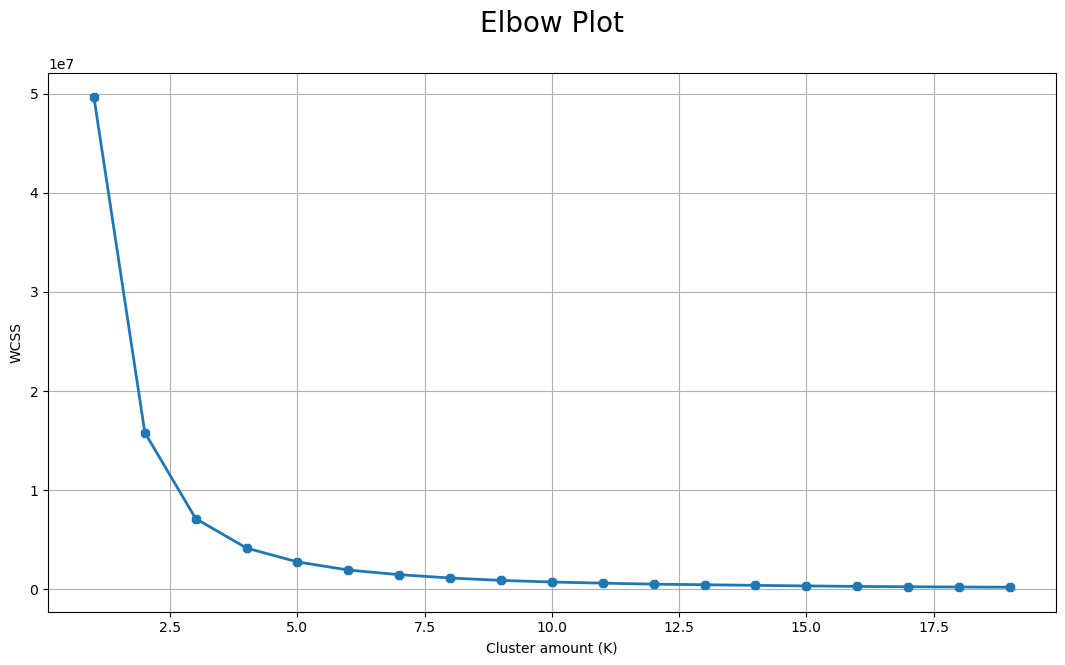

In [7]:
# creating the elbow with WSS
wcss = []
for k in range(1,20):
    kmeans = KMeans(n_clusters= k, init="k-means++" , random_state= 42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(13, 7))
plt.plot(range(1, 20), wcss, linewidth= 2, marker='8')
plt.title('Elbow Plot\n', fontsize= 20)
plt.xlabel("Cluster amount (K)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

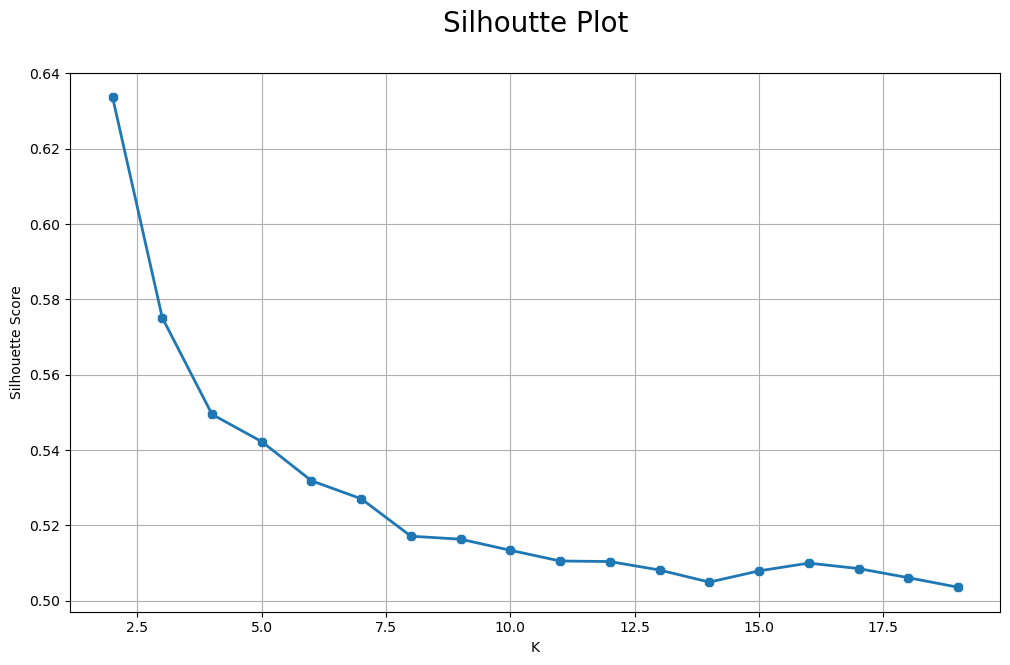

In [9]:
# Create a silhouette Score

silhouette = []
for k in range(2, 20):

    kmeans = KMeans(n_clusters = k, init = 'k-means++',random_state= 42)
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))
plt.plot(range(2, 20), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [ ]:
kmeans= KMeans(n_clusters= 5, init = "k-means++", random_state= 42)
kmeans.fit(X1)
